### Discrete Fourier Transform Examples

FFT documentation: [numpy](https://numpy.org/doc/stable/reference/routines.fft.html) [scipy](https://docs.scipy.org/doc/scipy/reference/tutorial/fft.html#d-discrete-fourier-transforms)

The transform:
$\chi \left[ k \right] = \sum_{n=0}^{N-1} x[n] e^{\frac{-i 2 \pi k n}{N}}$

In [8]:
#Calculate DFT Directly (slow)---------------------------------

import numpy as np

def dft(x):
    #convert ts data to an array of floats
    x = np.asarray(x, dtype=float)
    #Number of samples
    N = x.shape[0]
    #create an index array for n values
    n = np.arange(N)
    #checking proper shape of array (?)
    k = n.reshape((N,1))
    #compute dft coefficient
    M = np.exp(-2j * np.pi * k * n / N)
    #multiply ts by dft coefficients and returns an array
    return np.dot(M, x)

#compare with numpy fft function-------------------------------

#create random x sample data array of length 1024
x = np.random.random(1024)
#evaluates to True if elementwise both input arrays are equal within a tolerance margin
np.allclose(dft(x), np.fft.fft(x))
#print(type(dft(x)))

True

In [11]:
#DFT by recursion

def fft(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    
    if N % 2 > 0:
        raise ValueError("Must be a power of 2")
    elif N <= 2:
        return dft(x)
    else:
        X_even = fft(x[::2])
        X_odd = fft(x[1::2])
        
        terms = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([X_even + terms[:int(N/2)] * X_odd,
                               X_even + terms[int(N/2):] * X_odd])
    
x = np.random.random(32)
np.allclose(fft(x), np.fft.fft(x))

True

#### Using Numpy's FFT function for DFT in Python

- [video1](https://www.youtube.com/watch?v=R6u5BFOJDh0)
- 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

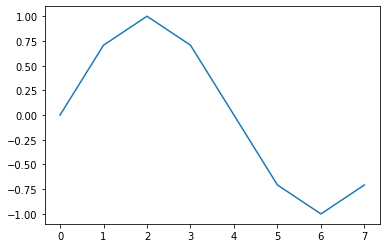

In [20]:
#using numpy.fft function video1 example

#8 samples, sample rate 8 Hz, of a 1Hz sine function

#generate index array of equal length to signal
#method 1
signal_span = np.r_[0: 2*np.pi: np.pi / 4]
#method 2
signal_span = np.arange(0, 2*np.pi, np.pi /4 )
#print(time_samples, signal_span)

#sample freq
s_freq = np.size(signal_span)

#how many samples?
N = signal_span.shape[0]

#Nyquist freq = sample frequency / 2
#sample frequency was odd, there wouldn't be a nyquist 
#
nyq = s_freq / 2

#signal------------------------------------------------
#basic sinusoid:
td = np.sin(signal_span)
plt.plot(td)
#random signal:
#signal = np.random.random(8)

#FFT
fd = np.fft.fft(td)

#compute magnitude
fd_absolute_val = np.abs(fd)

#DC term is the avg of all samples in the window
DC_value = fd_absolute_val[0]


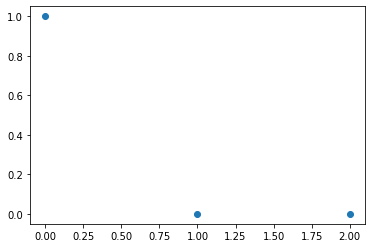

In [23]:
freqs = np.fft.fftfreq(N)
mask = freqs > 0

fft_theo = 2.0*np.abs(fd/N)

plt.plot(fft_theo[mask], 'o')
#plt.plot(fd_absolute_val, 'o', color='r')
plt.show()

[0.   0.01 0.02 0.03 0.04]
The Nyquist frequency: 5.0 The frequency resolution: 0.01


C:\Users\john\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


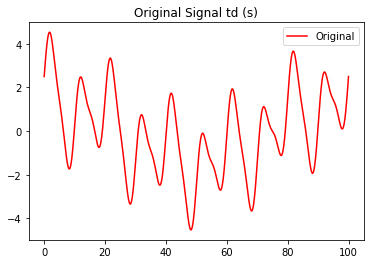

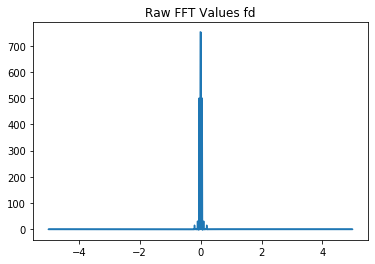

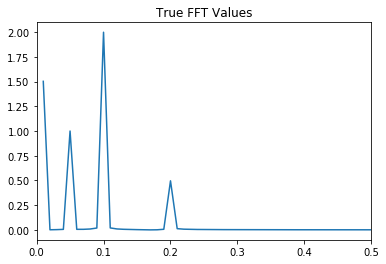

In [3]:
#FFT Numpy Example

import numpy as np
import matplotlib.pyplot as plt

##Set up domain

#total number of samples
n = 1000

#td length seconds
Lx = 100

#angular freq of fund frequency (2pi * fundfreq)
ang = 2.0 * np.pi / Lx

##create a signal for td
#instead of dt, third input parameter is number of samples
x = np.linspace(0, Lx, n)
y1 = 1.0*np.cos(5.0*ang*x)
y2 = 2.0*np.sin(10.0*ang*x)
y3 = 0.5*np.sin(20.0*ang*x)
y4 = 1.5*np.cos(ang*x)

#net signal
y = y1+y2+y3+y4
#random signal instead
#y = np.random.random(n)

##Prepatory steps
#create all necessary frequencies
#fftfreq returns an array all the FT sample frequencies with input of number of samples
# and kwp d = timestep size
freqs = np.fft.fftfreq(n, d = Lx/n)

#Nyquist freq = sample frequency / 2
#sample frequency was odd, there wouldn't be a nyquist
s_freq = n / Lx
nyq = s_freq / 2

#freq resolution
f_res = 1 / Lx
print("The Nyquist frequency: " + str(nyq) + " The frequency resolution: " + str(f_res))


#mask array for power spectra
#ignores half the values (the complex conjugates)
mask = freqs > 0

##FFT caculation
fft_vals = np.fft.fft(y)

#true theoretical fft
#What we'd actually get if we computed this theoretically (gets rid of weird raw fft output extraneous freq data)
#multiply by two because ignoring negative frequencies and get original power
fft_theo = 2.0*np.abs(fft_vals/n)

plt.figure(1)
plt.title('Original Signal td (s)')
plt.plot(x,y, color='r', label='Original')
plt.legend()

plt.figure(2)
plt.plot(freqs, fft_vals, label='Raw fft Values')
plt.title("Raw FFT Values fd")

#Notice how the freq spikes have amplitude matching the signal y amplitudes
plt.figure(3)
plt.plot(freqs[mask], fft_theo[mask], label='True fft Values')
plt.title('True FFT Values')
plt.xlim(0, 0.5)
plt.show()

In [ ]:
#examination of code behind plotting in above example
a = np.array([True, True, False])
b = np.array([1, 2, 3])

print(b[a])

for i in range(3):
    print(b[a[i]])
    
b[True]
b[False]

[15. -0.j         -2.5+3.4409548j  -2.5+0.81229924j -2.5-0.81229924j
 -2.5-3.4409548j ]


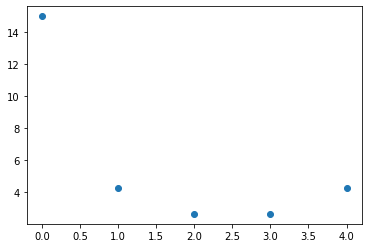

In [24]:
#FFT Scipy
from scipy import fftpack

#going to use fft, dct, ifft, idct

#algorithm used for DFT is most efficient when sample size is a power of two
#returns complex array
#fftpack.fft()


#simple example FFT------------------------------------------
y = np.array([1,2,3,4,5])
c = fftpack.fft(y)
print(c)

#plt.plot(abs(c), 'o')

#ifft
y_again = fftpack.ifft(c)
print(y_again)



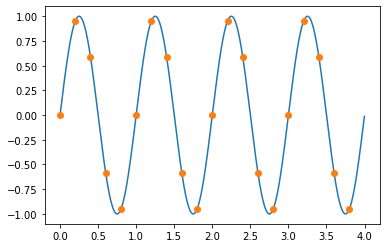

In [37]:
#aliasing and nyquist frequency scipy examples
from scipy import fft
import numpy as np
import matplotlib.pyplot as plt

##building td signal and parameters
#def sine wave
def y(f,t): return np.sin(2*np.pi*f*t)

#Parameters of FFT evaluated for 20 points
N = 20
f = 1 #freq Hz
dt = 0.2 #time spacing between samples (s)

f_Ny = 1 / (2.0*dt)
df = 1 / (N * dt) #frequency spacing

#time from 0 to total T = N*dt
t_sampled = np.arange(0, N*dt, dt)
# smooth sample with more data points
t_smooth = np.arange(0, N*dt, dt/100)
y_sampled = y(f, t_sampled)
y_smooth = y(f, t_smooth)

plt.plot(t_smooth, y_smooth)
plt.plot(t_sampled, y_sampled, 'o')
plt.show()

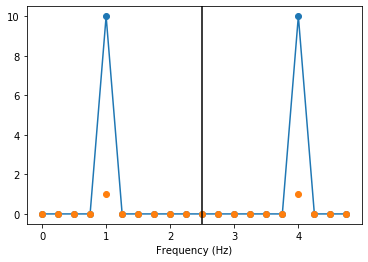

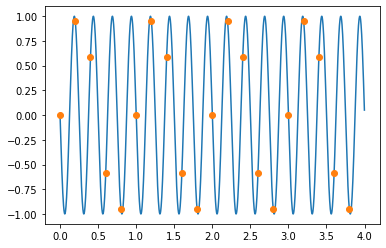

In [38]:
##Take the fft
#fft
c = fft.fft(y_sampled)

#defining fd domain up to frequency limit
freq = np.arange(0, 2 * f_Ny, df)

#Plot the fft
plt.figure(1)
#raw real
plt.plot(freq, abs(c), '-o')
#adjusted actual signal fd
plt.plot(freq, 2* abs(c)/N, 'o')

#identify nyquist frequency
plt.axvline(f_Ny, c='k')
plt.xlabel('Frequency (Hz)')

#make new version of y_smooth
plt.figure(2)
y_smooth = y(-4, t_smooth)
plt.plot(t_smooth, y_smooth)
plt.plot(t_sampled, y_sampled, 'o')
#the 4 Hz frequency of the signal still coincides with the
# original signal because of the complex conjugate terms at 4 Hz

plt.show()

Numpy is the basic scientific package which lets us use arrays as objects.

Scipy extends numpy using its array data structure for various scientific applications

C:\Users\john\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


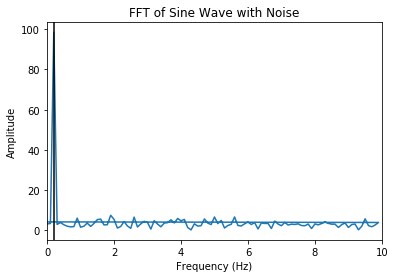

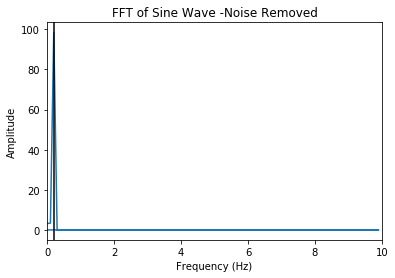

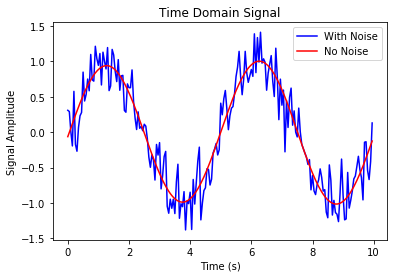

In [65]:
#Another Scipy Example
#we generate sine wave with random noise, then remove noise in fd by fft

import numpy as np
from scipy import fft

##Compute FFT

#time resolution
time_step = 0.05

#time domain of signal
td_sample_times = np.arange(0, 10, time_step)

#important parameters
N = td_sample_times.size #sample num
T = N * time_step #signal sample duration
f_sample = 1.0 / T #sample frequency
f_nyq = f_sample / 2.0

#generate signal
signal = (np.sin(2 * np.pi * td_sample_times))

#adjust signal to two cycles in duration of T = 10 s
period = 5.0
signal = (np.sin((2*np.pi*td_sample_times) / period))

#add some noise to the signal
signal += 0.25 * np.random.randn(td_sample_times.size)

#uncomment to print signal values
#print(np.round(signal, 2))

#compute fft
signal_fd = fft.fft(signal)

#find amplitude
amplitude = np.abs(signal_fd)

#power spectrum
power = amplitude**2

#phase spectrum
angle = np.angle(signal_fd)

#sample frequencies (domain of signal)
sample_fs = fft.fftfreq(N, d=time_step)

##Remove noise

#package amplitudes of fd signal and domain
amp_freq = np.array([amplitude, sample_fs])

#find peak frequency and its position in amp_freq
amp_position = amp_freq[0,:].argmax() #index position of max amplitude
peak_freq = amp_freq[1, amp_position] #freq at that amplitude

#remove freq spectrum values greater than the peak freq
high_freq_fft = signal_fd.copy()
high_freq_fft[np.abs(sample_fs) > peak_freq] = 0

filtered_function = fft.ifft(high_freq_fft)

##plotting
plt.figure(1)
plt.plot(sample_fs, amplitude)
plt.title("FFT of Sine Wave with Noise")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.axvline(peak_freq, color='k')
plt.xlim(0.0, 10.0)

plt.figure(2)
plt.plot(sample_fs, np.abs(high_freq_fft))
plt.title("FFT of Sine Wave -Noise Removed")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.axvline(peak_freq, color='k')
plt.xlim(0.0, 10.0)

plt.figure(3)
plt.plot(td_sample_times, signal, color='b', label="With Noise")
plt.plot(td_sample_times, filtered_function, color='r', label='No Noise')
plt.title("Time Domain Signal")
plt.xlabel("Time (s)")
plt.ylabel("Signal Amplitude")
plt.legend()
plt.show()

In [2]:
import numpy as np
#coding aside to understand example
a = np.array([3,2,1])
b = np.array([4,5,6])
amp_freq = np.array([a, b])
max_num_position = amp_freq[0, :].argmax()
print(max_num_position, amp_freq[0,0])
max_num_value = amp_freq[1, max_num_position]
print(max_num_value)

0 3
4
